<a href="https://colab.research.google.com/github/narendra7959/R-Practicals/blob/main/Assignment_7_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOGISTIC REGRESSION**

In [1]:
# Narendra
# Reg No : 24040208002

In [ ]:
install.packages("caret", dependencies=TRUE)
install.packages("mlbench")  # Needed for PIMA dataset
install.packages("pROC")     # Needed for ROC Curve
install.packages("ggplot2")  # For visualization
install.packages("dplyr")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘rbibutils’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘Rdpack’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’

In [ ]:
# Load necessary libraries
library(caret)
library(pROC)
library(ggplot2)
library(dplyr)
library(tidyr)

Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Load the PIMA dataset
data(PimaIndiansDiabetes, package = "mlbench")

**Attributes**

In [ ]:
# Get the number of records (rows)
num_records <- nrow(PimaIndiansDiabetes)

# Print the number of records
print(num_records)


table(PimaIndiansDiabetes$diabetes)

[1] 768



neg pos 
500 268 

In [ ]:
# Get summary statistics (equivalent to data.describe()
summary(PimaIndiansDiabetes)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

**computing proportions**

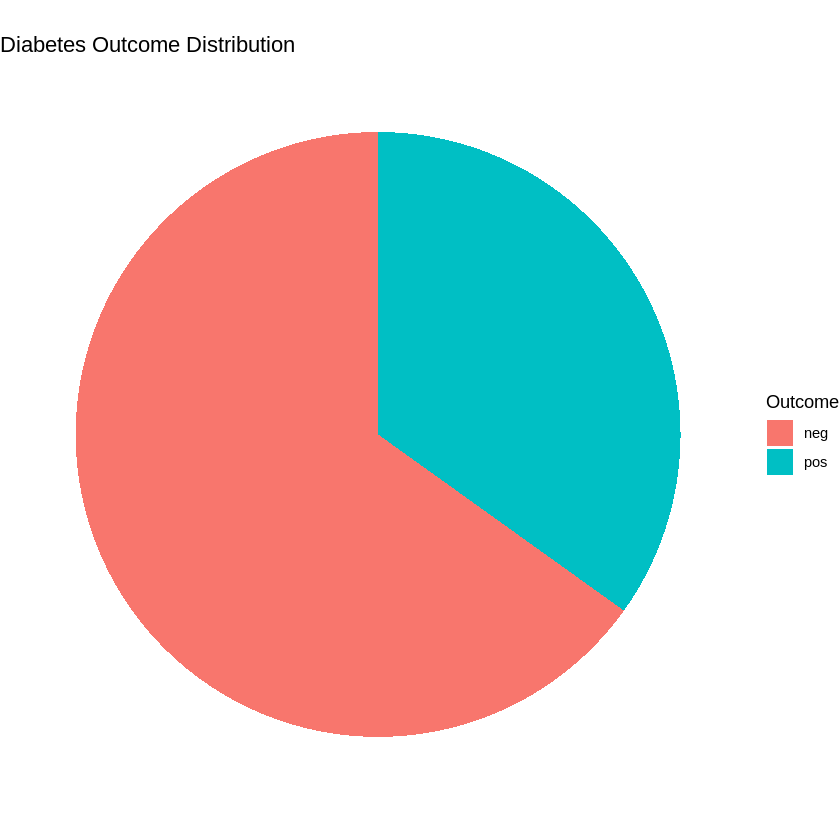

In [ ]:
# Compute proportions of outcome values (Diabetes vs No Diabetes)
target <- prop.table(table(PimaIndiansDiabetes$diabetes))

# Convert to a dataframe for visualization
target_df <- as.data.frame(target)
colnames(target_df) <- c("Outcome", "Proportion")

# Plot the pie chart
ggplot(target_df, aes(x = "", y = Proportion, fill = Outcome)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  ggtitle("Diabetes Outcome Distribution")


**visualizing data**

In [ ]:
# Convert Outcome to a factor for visualization
PimaIndiansDiabetes$diabetes <- factor(PimaIndiansDiabetes$diabetes,
                                       levels = c("neg", "pos"),
                                       labels = c("Healthy", "Diabetic"))
# Modified function for better visualization
compare_dist_by_target <- function(features, data) {
  for (feature in features) {
    # Create histogram with density overlay
    p <- ggplot(data, aes_string(x = feature, fill = "diabetes")) +
      geom_histogram(aes(y = ..count..), alpha = 0.4, bins = 20, position = "identity", color = "black") +
      geom_density(aes(y = ..count.., color = diabetes), size = 1,fill = NA) +
      scale_fill_manual(values = c("Healthy" = "green", "Diabetic" = "red")) +  # Matching colors
      scale_color_manual(values = c("Healthy" = "green", "Diabetic" = "red")) +  # KDE curve colors
      labs(title = paste(feature, "distplot for Diabetic vs Healthy"),
           x = feature, y = "Count") +
      theme_minimal(base_size = 14) +
      theme(legend.position = "top",
            legend.title = element_blank(),
            plot.title = element_text(hjust = 0.5, face = "bold"))

    # Print the plot
    print(p)
  }
}

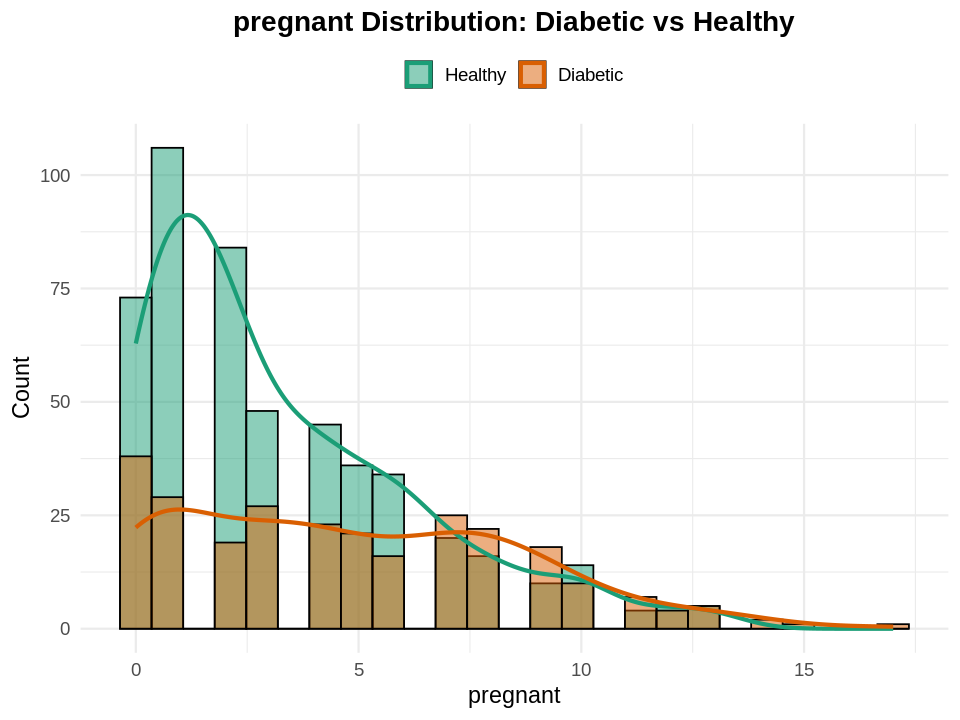

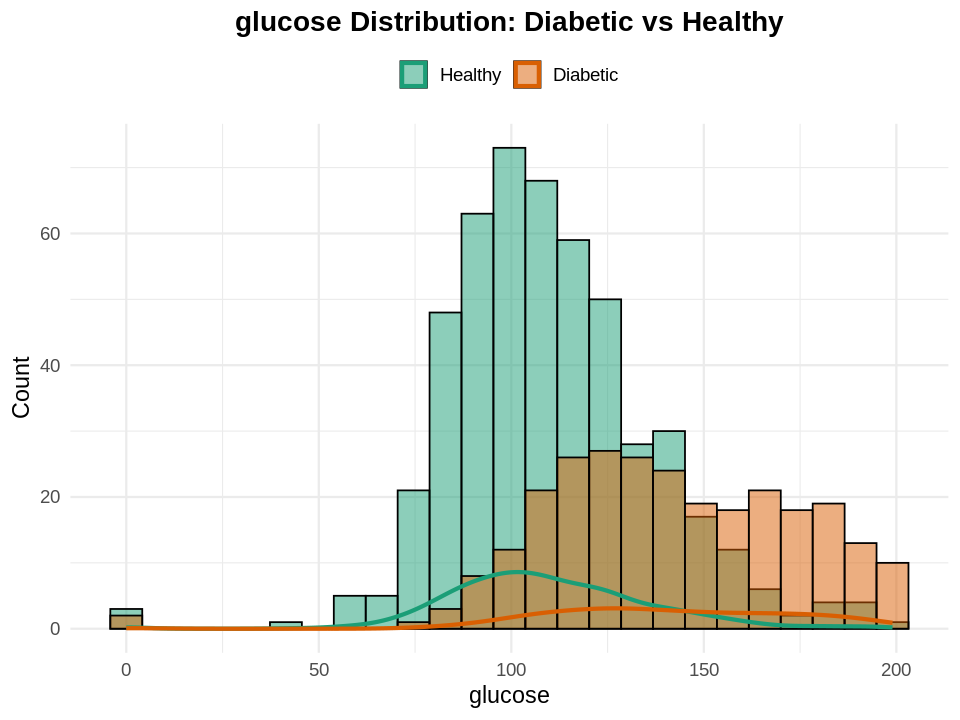

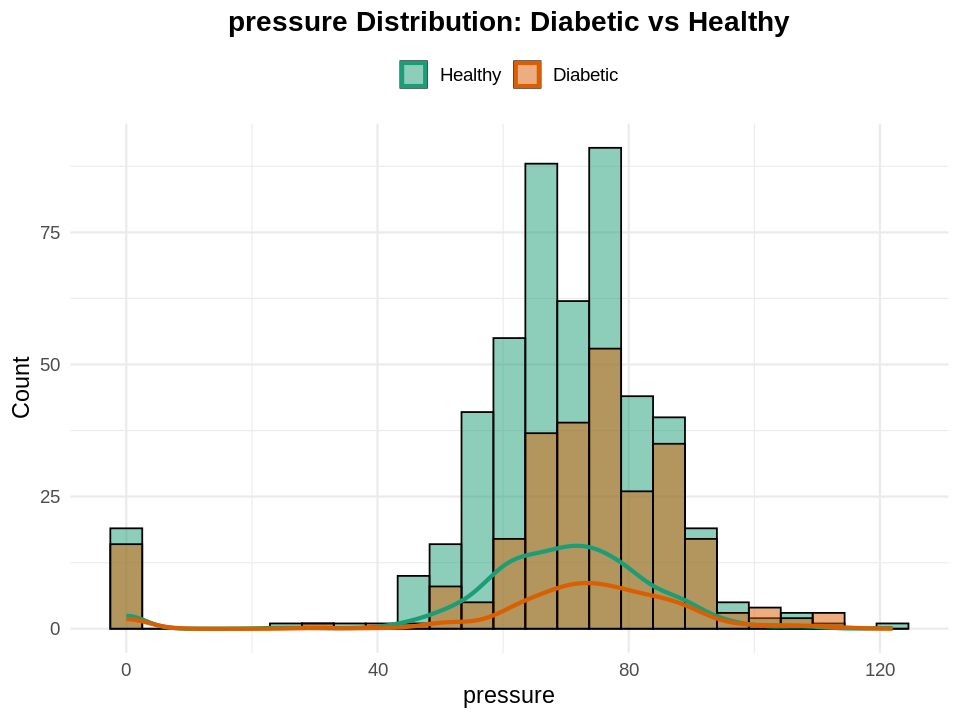

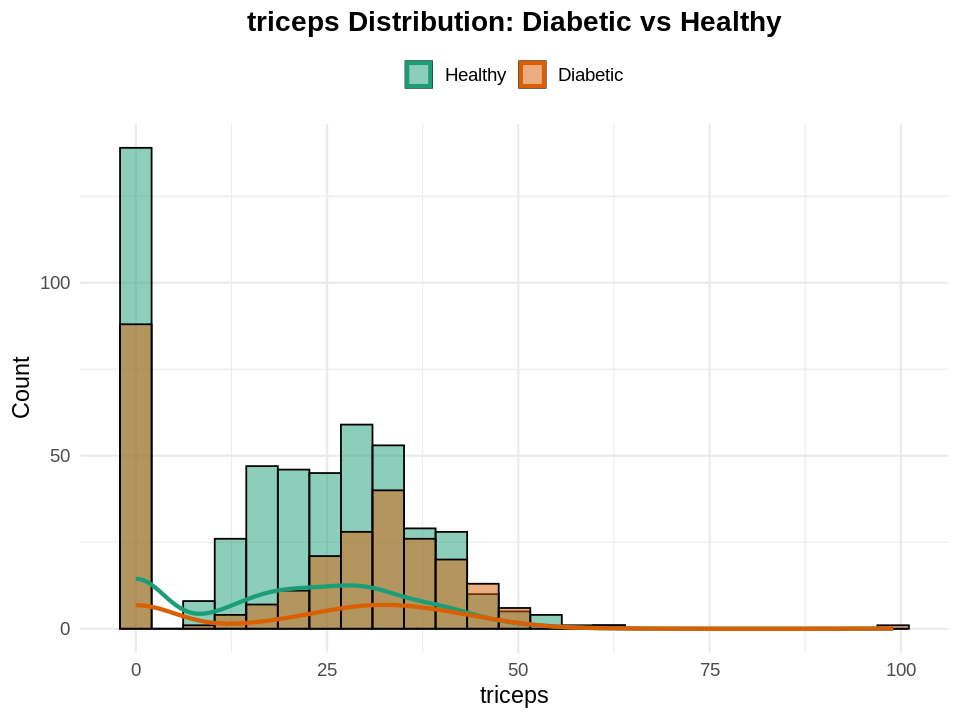

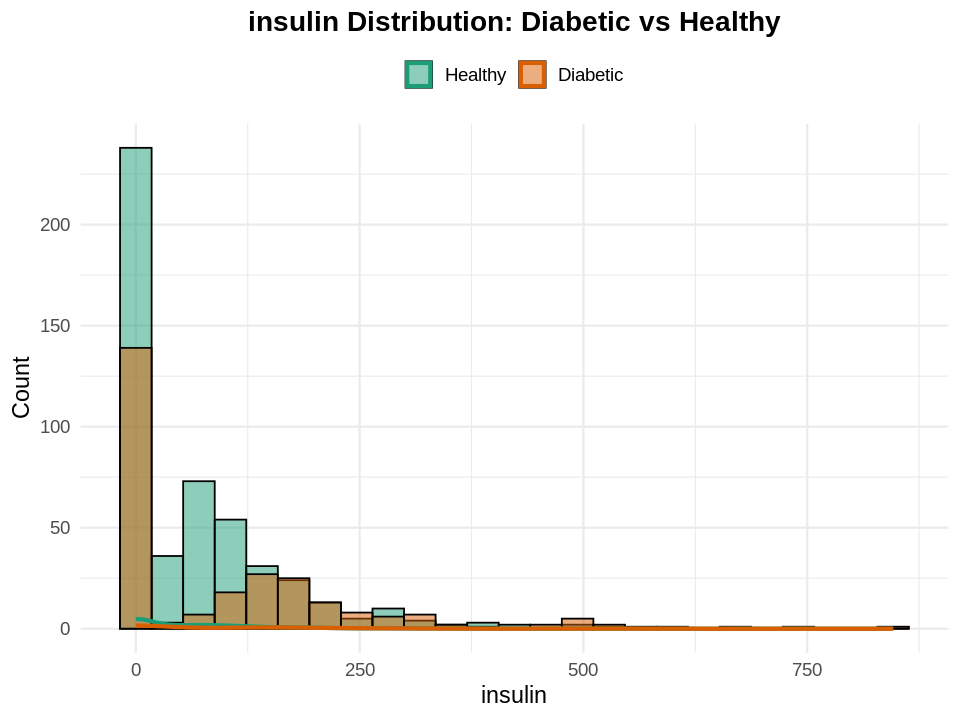

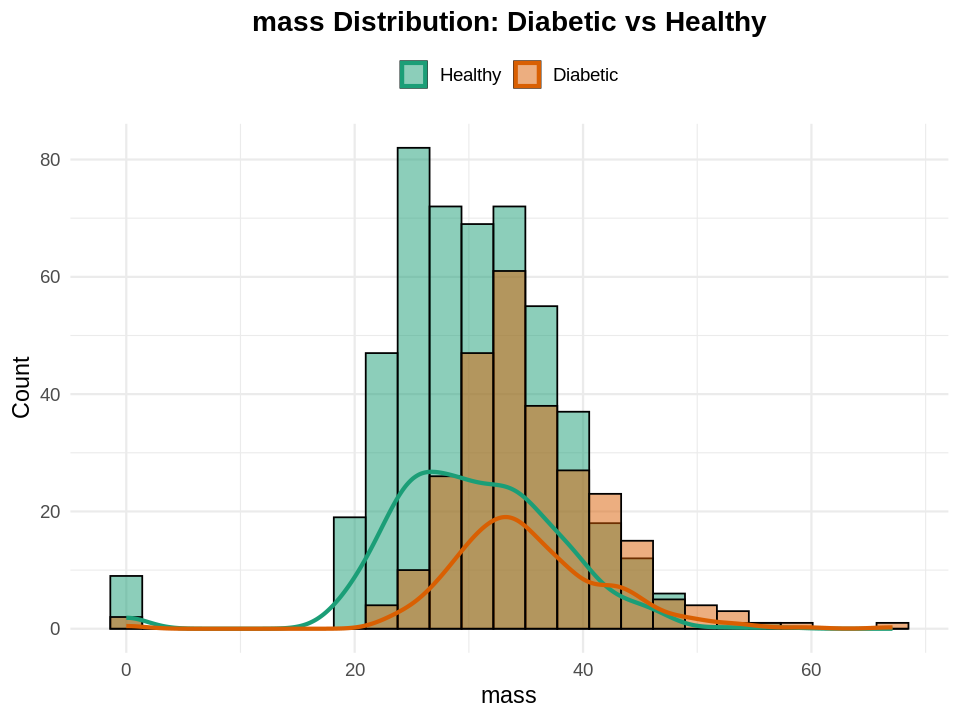

$pregnant

$glucose

$pressure

$triceps

$insulin

$mass

$pedigree

$age


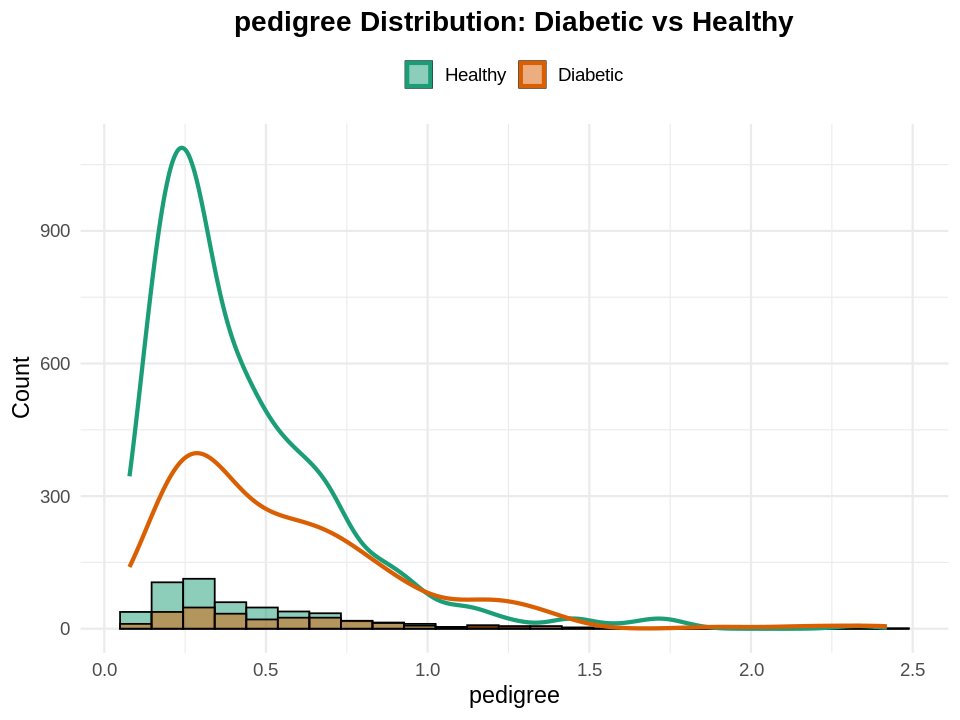

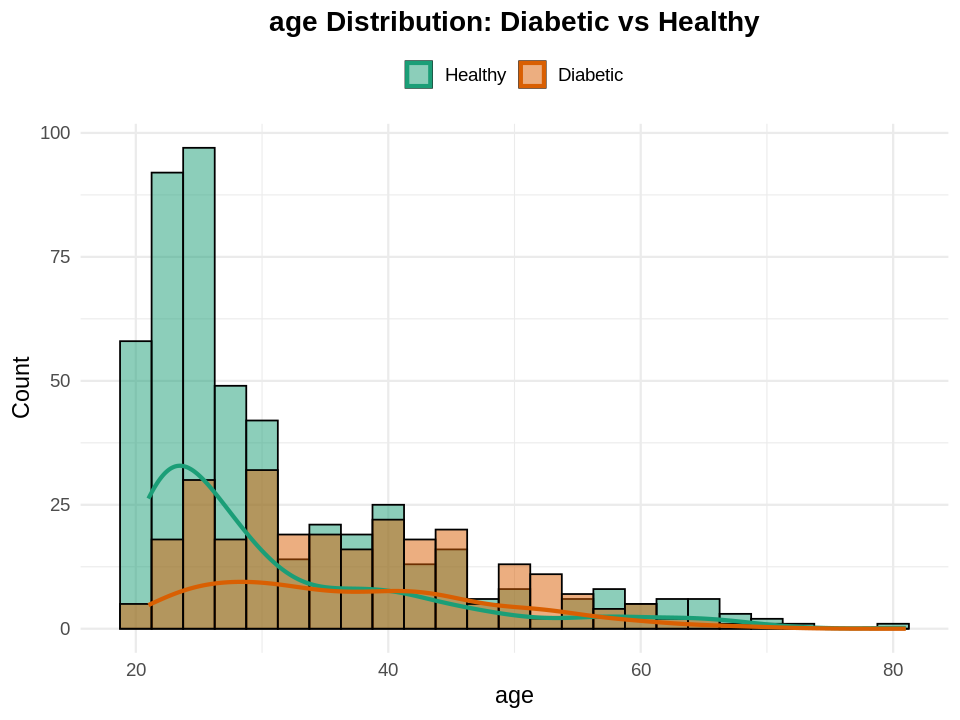

In [ ]:
# Increase plot size
options(repr.plot.width = 8, repr.plot.height = 6)

# Get all feature names excluding 'diabetes' (Outcome)
features <- setdiff(names(PimaIndiansDiabetes), "diabetes")

# Call the function for visualization
compare_dist_by_target(features, PimaIndiansDiabetes)

**checking for missing values**

In [ ]:
colSums(is.na(PimaIndiansDiabetes))

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        0        0        0        0        0        0        0 
diabetes 
       0

**logistic regression**

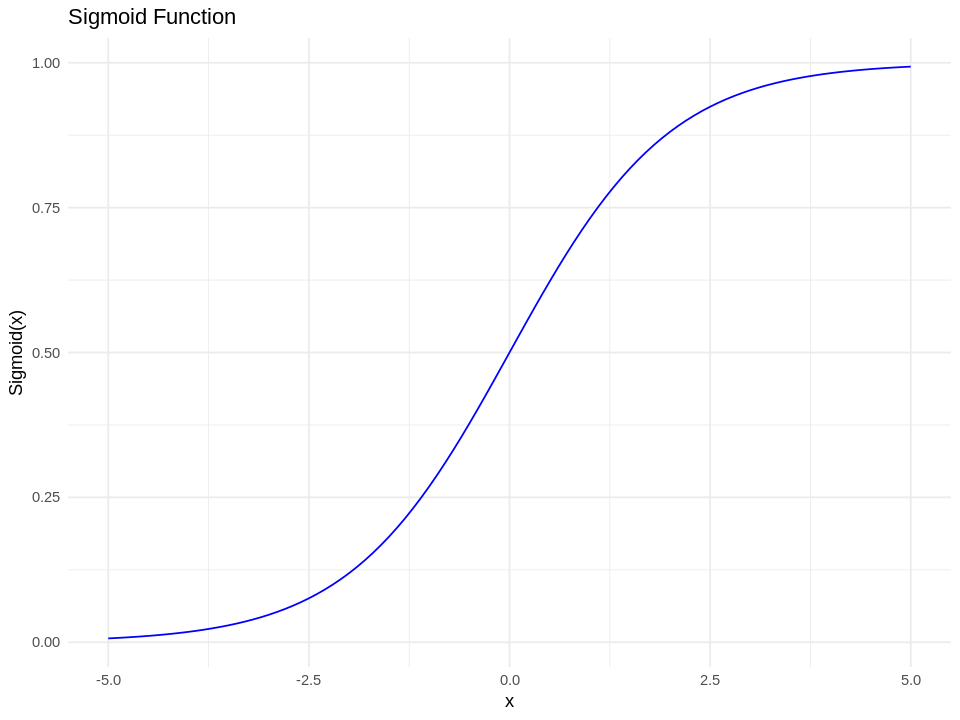

In [ ]:
# Defining the sigmoid function
sigmoid <- function(x) {
  return (1 / (1 + exp(-x)))
}

# Generate inputs from -5 to 5
x <- seq(-5, 5, by = 0.1)

# Apply the sigmoid function
sig <- sigmoid(x)

# Create a data frame for plotting
df <- data.frame(x = x, sigmoid = sig)

# Plot using ggplot2
ggplot(df, aes(x = x, y = sigmoid)) +
  geom_line(color = "blue") +
  ggtitle("Sigmoid Function") +
  xlab("x") +
  ylab("Sigmoid(x)") +
  theme_minimal()


In [ ]:
# Display the first 6 rows of the dataset (default)
head(PimaIndiansDiabetes)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,Diabetic
2,1,85,66,29,0,26.6,0.351,31,Healthy
3,8,183,64,0,0,23.3,0.672,32,Diabetic
4,1,89,66,23,94,28.1,0.167,21,Healthy
5,0,137,40,35,168,43.1,2.288,33,Diabetic
6,5,116,74,0,0,25.6,0.201,30,Healthy


**corerelation plot**

In [ ]:
# Install the ggcorrplot package within R using the correct syntax.
# This will only work within an R environment like RStudio or an R kernel in Jupyter.
install.packages("ggcorrplot")

# Load the ggcorrplot package
library(ggcorrplot)

# Continue with the rest of your R code.
cor_matrix <- cor(PimaIndiansDiabetes[, sapply(PimaIndiansDiabetes, is.numeric)], use = "complete.obs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



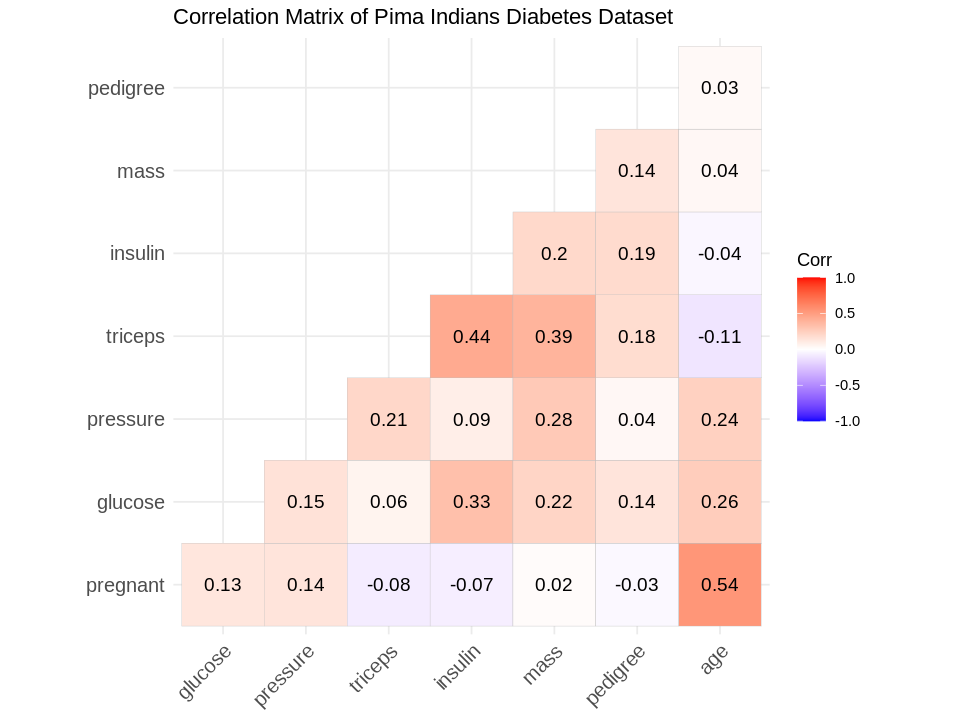

In [ ]:
# Create a professional-looking heatmap (Lower Triangle)
ggcorrplot(cor_matrix, method = "square", type = "lower",
           colors = c("blue", "white", "red"),  # Blue for negative, red for positive
           lab = TRUE,  # Show correlation values
           lab_size = 4,  # Increase text size
           title = "Correlation Matrix of Pima Indians Diabetes Dataset",
           ggtheme = theme_minimal())

**other form of correlation matrix**


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




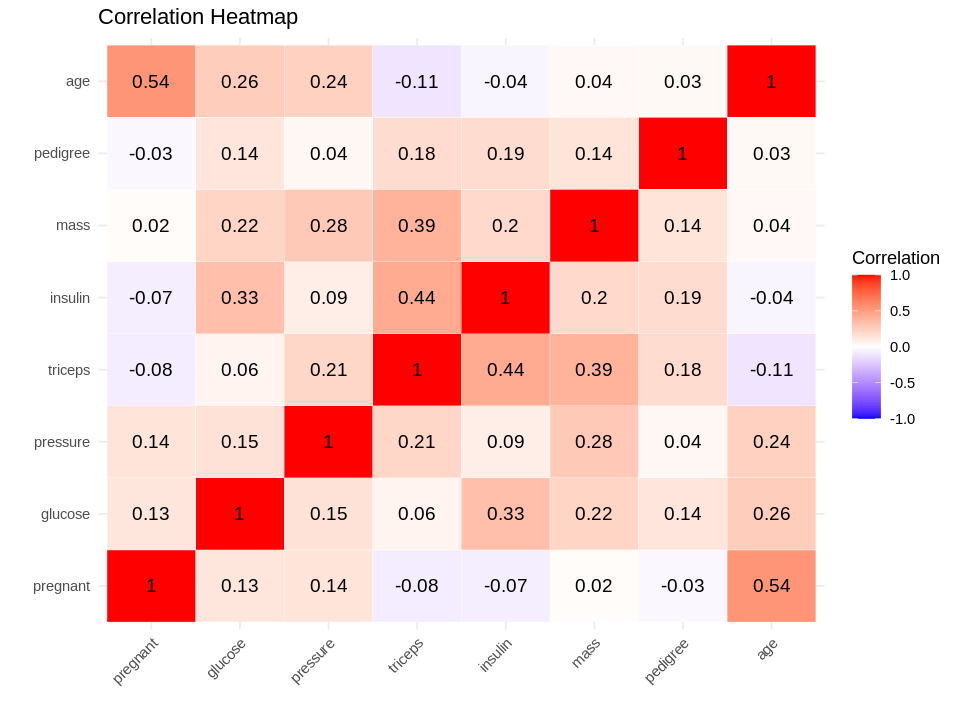

In [ ]:
library(reshape2)

# Compute correlation matrix
cor_matrix <- cor(PimaIndiansDiabetes[, sapply(PimaIndiansDiabetes, is.numeric)], use = "complete.obs")

# Convert matrix to long format
cor_long <- melt(cor_matrix)

# Heatmap with professional styling
ggplot(cor_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +  # White gridlines for better separation
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0,
                       limit = c(-1,1), space = "Lab", name="Correlation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +  # Add text labels
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(title = "Correlation Heatmap", x = "", y = "")

In [ ]:
# Load the caret package for data partitioning
library(caret)

# Load the mlbench package for PimaIndiansDiabetes dataset
library(mlbench)

# Load the dataset
data(PimaIndiansDiabetes, package = "mlbench")

# Partition data
trainIndex <- createDataPartition(PimaIndiansDiabetes$diabetes, p = 0.7, list = FALSE)
trainData <- PimaIndiansDiabetes[trainIndex, ]
testData <- PimaIndiansDiabetes[-trainIndex, ]

# Check dimensions
dim(trainData)
dim(testData)

[1] 538   9

[1] 230   9

**training logostic regression model**

In [ ]:
logit_model <- glm(diabetes ~ ., data = trainData, family = binomial)
predictions <- predict(logit_model, testData, type = "response")  # Get probabilities
pred_class <- ifelse(predictions > 0.5, "Diabetic", "Healthy")  # Convert probabilities to class labels

table(pred_class)  # Check if all predictions are same
table(testData$diabetes, pred_class)

table(trainData$diabetes)

pred_class
Diabetic  Healthy 
      63      167 

     pred_class
      Diabetic Healthy
  neg       12     138
  pos       51      29


neg pos 
350 188 

**build the model**

In [ ]:
# Train a logistic regression model
logit_model <- glm(diabetes ~ ., data = trainData, family = binomial)
table(trainData$diabetes)


neg pos 
350 188 

In [ ]:
# Predict on test data
pred_prob <- predict(logit_model, testData, type = "response")
# pred_class <- ifelse(pred_prob > 0.5, "pos", "neg")
# pred_class <- ifelse(predictions > 0.5, "Diabetic","Healthy")
pred_class <- ifelse(pred_prob > 0.5, "Diabetic", "Healthy")
pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))

In [ ]:
# Convert predictions and actual values into factors for confusion matrix
#pred_class <- factor(pred_class, levels = c("neg", "pos"))
# pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))
#actual_class <- factor(testData$diabetes, levels = c("neg", "pos"))
actual_class <- factor(testData$diabetes, levels = c("Healthy", "Diabetic"))

In [ ]:
# Generate a confusion matrix
conf_matrix <- confusionMatrix(pred_class, actual_class)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction Healthy Diabetic
  Healthy        0        0
  Diabetic       0        0
                                  
               Accuracy : NaN     
                 95% CI : (NA, NA)
    No Information Rate : NA      
    P-Value [Acc > NIR] : NA      
                                  
                  Kappa : NaN     
                                  
 Mcnemar's Test P-Value : NA      
                                  
            Sensitivity :  NA     
            Specificity :  NA     
         Pos Pred Value :  NA     
         Neg Pred Value :  NA     
             Prevalence : NaN     
         Detection Rate : NaN     
   Detection Prevalence : NaN     
      Balanced Accuracy :  NA     
                                  
       'Positive' Class : Healthy 
                                  


**confusion matrix**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



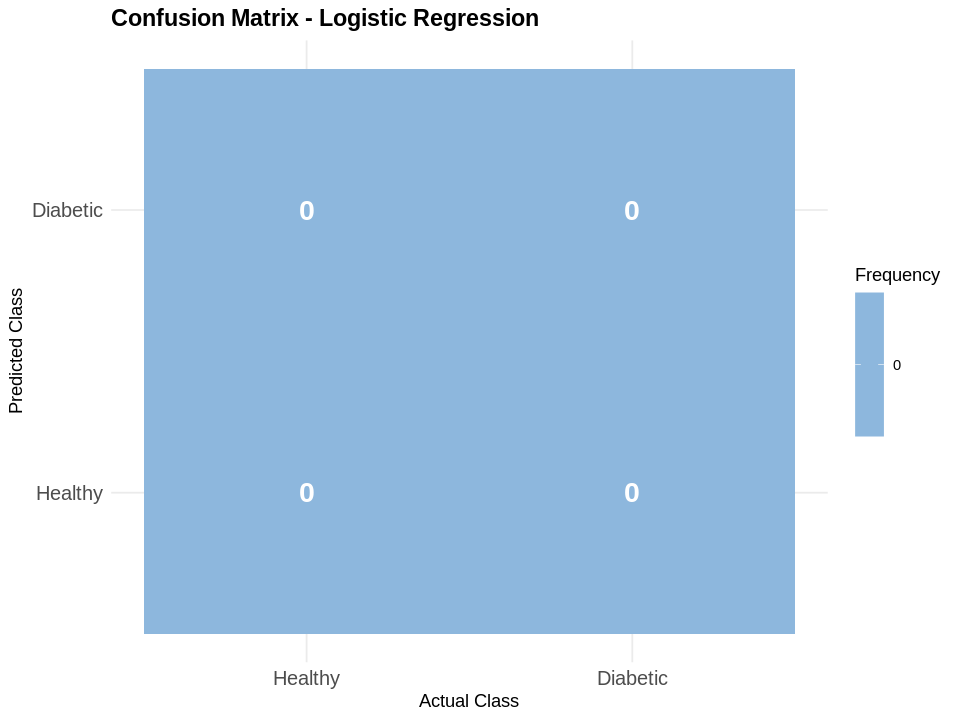

In [ ]:
# Install the pheatmap package before trying to use it
if (!requireNamespace("pheatmap", quietly = TRUE)) {
  install.packages("pheatmap")
}

# Now load the pheatmap package
library(pheatmap)

# Generate the confusion matrix again (if needed)
conf_mat_table <- as.data.frame(conf_matrix$table)
colnames(conf_mat_table) <- c("Reference", "Prediction", "Frequency")

# Define professional color palette
professional_colors <- scale_fill_gradient(low = "#D6EAF8", high = "#2E86C1") # Light to dark blue

# Professional Confusion Matrix Plot
ggplot(conf_mat_table, aes(x = Reference, y = Prediction, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "white", size = 6, fontface = "bold") +
  professional_colors +
  labs(title = "Confusion Matrix - Logistic Regression",
       x = "Actual Class",
       y = "Predicted Class") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14),
        axis.text = element_text(size = 12),
        legend.position = "right")


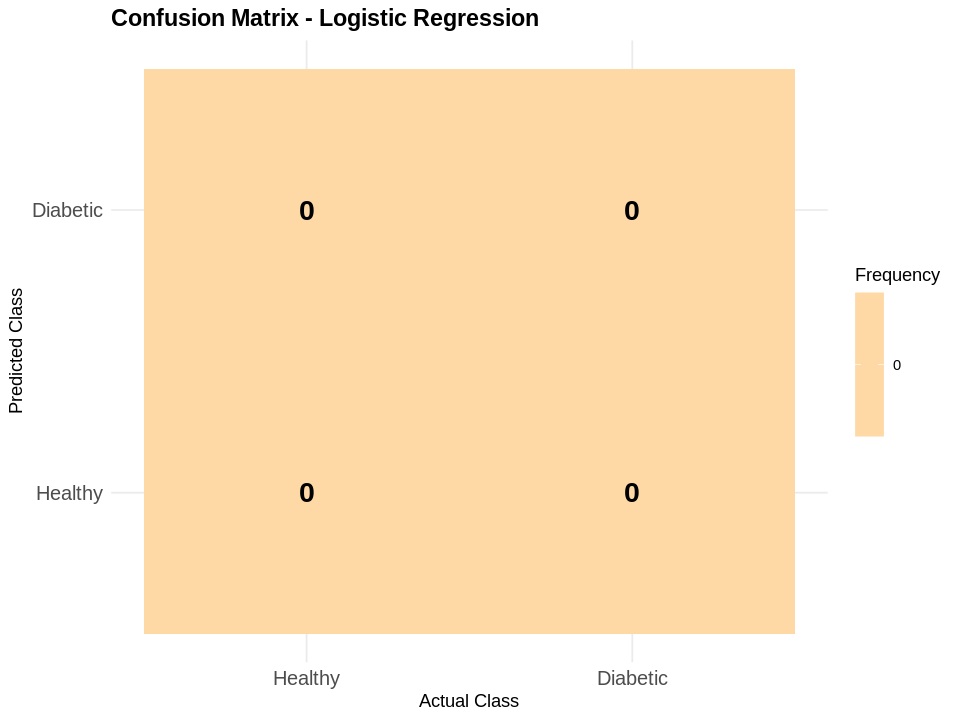

In [ ]:
# Install the RColorBrewer package within R if not installed
if (!requireNamespace("RColorBrewer", quietly = TRUE)) {
  install.packages("RColorBrewer")
}

# Now load the RColorBrewer package
library(RColorBrewer)

# Define pastel colors using RColorBrewer
pastel_colors <- scale_fill_gradientn(colors = brewer.pal(9, "Pastel1"))

# Generate the confusion matrix again (if needed)
conf_mat_table <- as.data.frame(conf_matrix$table)
colnames(conf_mat_table) <- c("Reference", "Prediction", "Frequency")

# Plot Confusion Matrix with Pastel Colors
ggplot(conf_mat_table, aes(x = Reference, y = Prediction, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "black", size = 6, fontface = "bold") + # Black text for better contrast
  pastel_colors +
  labs(title = "Confusion Matrix - Logistic Regression",
       x = "Actual Class",
       y = "Predicted Class") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14),
        axis.text = element_text(size = 12),
        legend.position = "right")

**checking AUC Value**

Setting levels: control = neg, case = pos

Setting direction: controls < cases



[1] "AUC: 0.851"


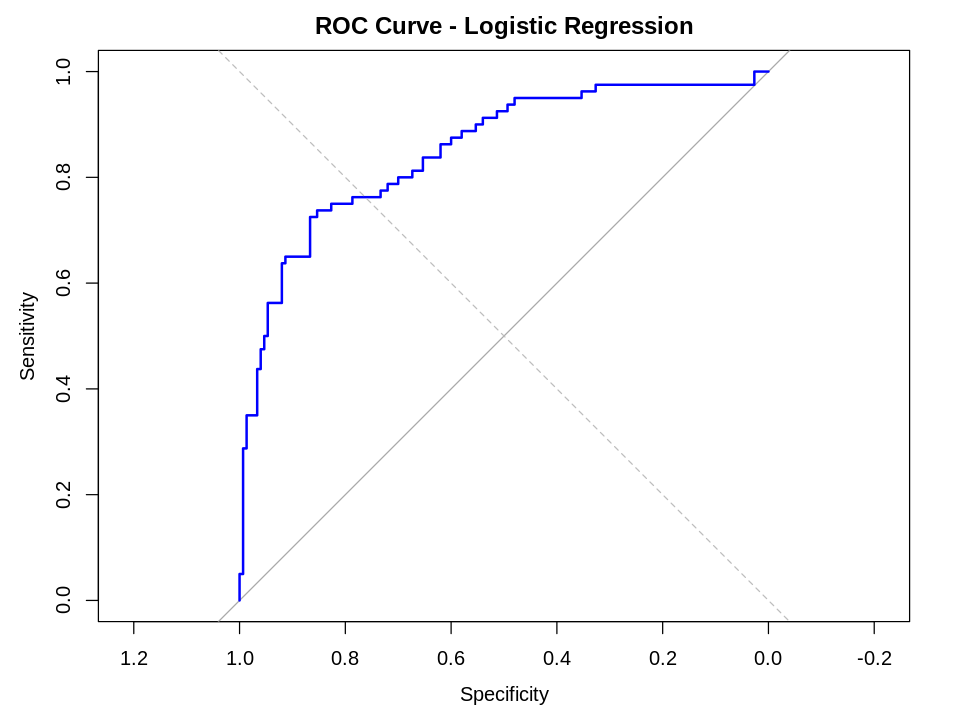

In [ ]:
library(pROC)    # For ROC curve and AUC
# Generate ROC curve data
roc_curve <- roc(testData$diabetes, pred_prob)

# Plot ROC Curve using base plot
plot(roc_curve, col = "blue", lwd = 2, main = "ROC Curve - Logistic Regression")
abline(a=0, b=1, lty=2, col="gray")  # Add diagonal reference line

# Display AUC (Area Under Curve) - Determines Model performance
auc_value <- auc(roc_curve)
print(paste("AUC:", round(auc_value, 3)))


**recommened threshold**

In [ ]:
# Get probability predictions
# pred_prob <- predict(logit_model, testData, type = "response")

# Define a sequence of probability thresholds
thresholds <- seq(0.1, 0.9, by = 0.05)

# Function to calculate F1 score
calculate_f1 <- function(threshold) {
  pred_class <- ifelse(pred_prob > threshold, "Diabetic", "Healthy")
  pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))

  actual_class <- factor(testData$diabetes, levels = c("Healthy", "Diabetic"))

  conf_matrix <- confusionMatrix(pred_class, actual_class)

  precision <- conf_matrix$byClass["Precision"]
  recall <- conf_matrix$byClass["Recall"]

  f1 <- 2 * ((precision * recall) / (precision + recall))
  return(f1)
}

# Compute F1 scores for different thresholds
f1_scores <- sapply(thresholds, calculate_f1)

# Find the best threshold
best_threshold <- thresholds[which.max(f1_scores)]
best_f1 <- max(f1_scores)

# Print the best threshold and its F1-score
cat("Best Threshold:", best_threshold, "\nBest F1 Score:", best_f1, "\n")

Best Threshold:  
Best F1 Score: NA 


**best probability threshold**

In [ ]:
# Get probability predictions
# pred_prob <- predict(logit_model, testData, type = "response")

# Define a sequence of probability thresholds
thresholds <- seq(0.1, 0.9, by = 0.05)

# Function to calculate F1 score
calculate_f1 <- function(threshold) {
  pred_class <- ifelse(pred_prob > threshold, "Diabetic", "Healthy")
  pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))

  actual_class <- factor(testData$diabetes, levels = c("Healthy", "Diabetic"))

  conf_matrix <- confusionMatrix(pred_class, actual_class)

  # Check if precision or recall are NA/NaN before calculating F1
  precision <- conf_matrix$byClass["Precision"]
  recall <- conf_matrix$byClass["Recall"]

  if (is.na(precision) || is.na(recall) || is.nan(precision) || is.nan(recall)) {
    return(0)  # Or another appropriate value to indicate an error
  } else {
    f1 <- 2 * ((precision * recall) / (precision + recall))
    return(f1)
  }
}

# Compute F1 scores for different thresholds
f1_scores <- sapply(thresholds, calculate_f1)

# Find the best threshold, handling the case where all F1 scores are 0
if (all(f1_scores == 0)) {
  cat("Warning: All F1 scores are 0. No best threshold found.\n")
  best_threshold <- NA  # Or another appropriate value
  best_f1 <- NA
} else {
  best_threshold <- thresholds[which.max(f1_scores)]
  best_f1 <- max(f1_scores)
}


# Print the best threshold and its F1-score
cat("Best Threshold:", best_threshold, "\nBest F1 Score:", best_f1, "\n")

Best Threshold: NA 
Best F1 Score: NA 
